## Exercise
### Do your work for these exercises in a jupyter notebook named `scaling`. Use the `telco` dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os

import pandas as pd
import numpy as np

import wrangle, prepare

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing

In [2]:
train, validate, test = wrangle.wrangle_telco()
train.head()

,customer_id,monthly_charges,tenure,total_charges
728,4573-JKNAE,19.35,12,212.30
366,2229-DPMBI,19.50,8,162.15
262,1568-LJSZU,92.20,68,6392.85
1629,9661-JALZV,24.70,58,1519.00
568,3498-LZGQZ,19.15,63,1177.05


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can.

In [3]:
# Create 3 linear scalers: min-max, standard, and robust

scaler_minmax = sklearn.preprocessing.MinMaxScaler()
scaler_standard = sklearn.preprocessing.StandardScaler()
scaler_robust = sklearn.preprocessing.RobustScaler()

scaler_minmax, scaler_standard, scaler_robust

(MinMaxScaler(copy=True, feature_range=(0, 1)),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
              with_scaling=True))

In [4]:
# Define the function that add scaled columns

def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])

    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [5]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
728,4573-JKNAE,19.35,12,212.30
366,2229-DPMBI,19.50,8,162.15
262,1568-LJSZU,92.20,68,6392.85
1629,9661-JALZV,24.70,58,1519.00
568,3498-LZGQZ,19.15,63,1177.05


In [6]:
# Min-Max Scaling

columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

train_minmax, validate_minmax, test_minmax = add_scaled_columns(train, validate, test, 
                                                                scaler_minmax, 
                                                                columns_to_scale)

In [7]:
train_minmax.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,4573-JKNAE,19.35,12,212.30,0.005503,0.154930,0.022185
366,2229-DPMBI,19.50,8,162.15,0.007004,0.098592,0.016389
262,1568-LJSZU,92.20,68,6392.85,0.734367,0.943662,0.736526
1629,9661-JALZV,24.70,58,1519.00,0.059030,0.802817,0.173212
568,3498-LZGQZ,19.15,63,1177.05,0.003502,0.873239,0.133690


Text(0.5, 1.0, 'Scaled total_charges')

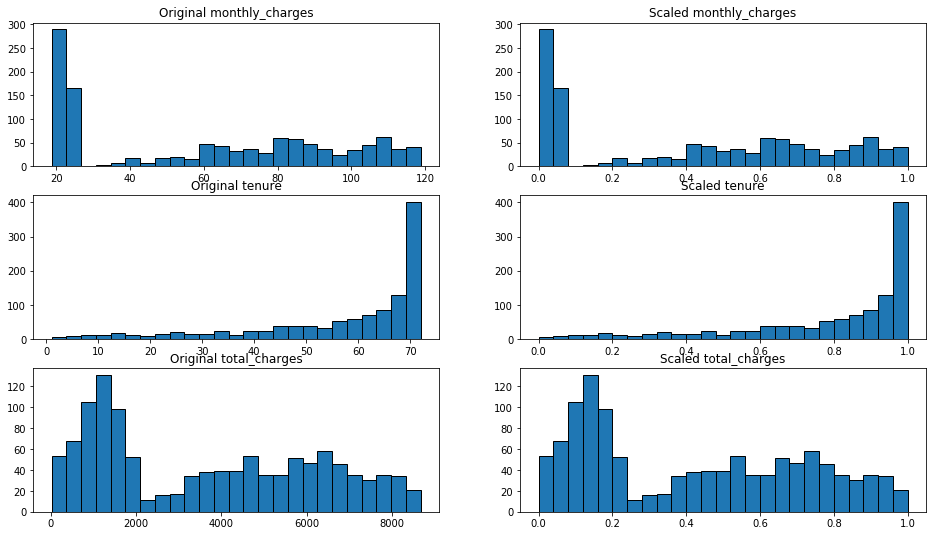

In [12]:
# Visualize the results of min-max scaling

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_minmax.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_minmax.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_minmax.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_minmax.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_minmax.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_minmax.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

In [13]:
# Standard Scaler

columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

train_standard, validate_standard, test_standard = add_scaled_columns(train, validate, test,
                                                                      scaler_standard,
                                                                      columns_to_scale)

In [17]:
train_standard.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,4573-JKNAE,19.35,12,212.30,-1.172745,-2.499711,-1.345114
366,2229-DPMBI,19.50,8,162.15,-1.168401,-2.722390,-1.364672
262,1568-LJSZU,92.20,68,6392.85,0.937094,0.617786,1.065275
1629,9661-JALZV,24.70,58,1519.00,-1.017801,0.061090,-0.835507
568,3498-LZGQZ,19.15,63,1177.05,-1.178537,0.339438,-0.968866


Text(0.5, 1.0, 'Scaled total_charges')

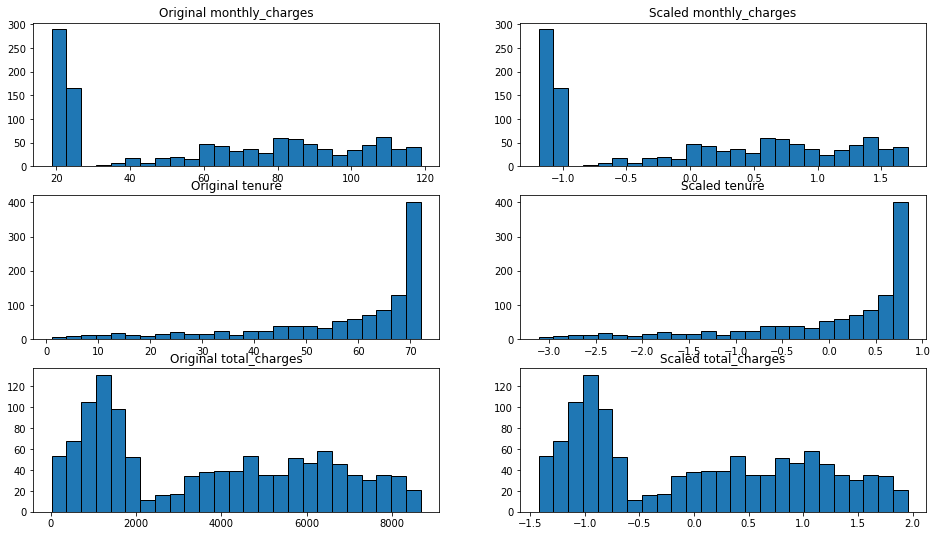

In [14]:
# Visualize the results of standard scaler

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_standard.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_standard.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_standard.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_standard.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_standard.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_standard.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

In [15]:
# RobustScaler

columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

train_robust, validate_robust, test_robust = add_scaled_columns(train, validate, test,
                                                                scaler_robust,
                                                                columns_to_scale)

In [18]:
train_robust.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,4573-JKNAE,19.35,12,212.30,-0.635472,-2.260870,-0.703641
366,2229-DPMBI,19.50,8,162.15,-0.633208,-2.434783,-0.714316
262,1568-LJSZU,92.20,68,6392.85,0.464151,0.173913,0.611971
1629,9661-JALZV,24.70,58,1519.00,-0.554717,-0.260870,-0.425493
568,3498-LZGQZ,19.15,63,1177.05,-0.638491,-0.043478,-0.498281


Text(0.5, 1.0, 'Scaled total_charges')

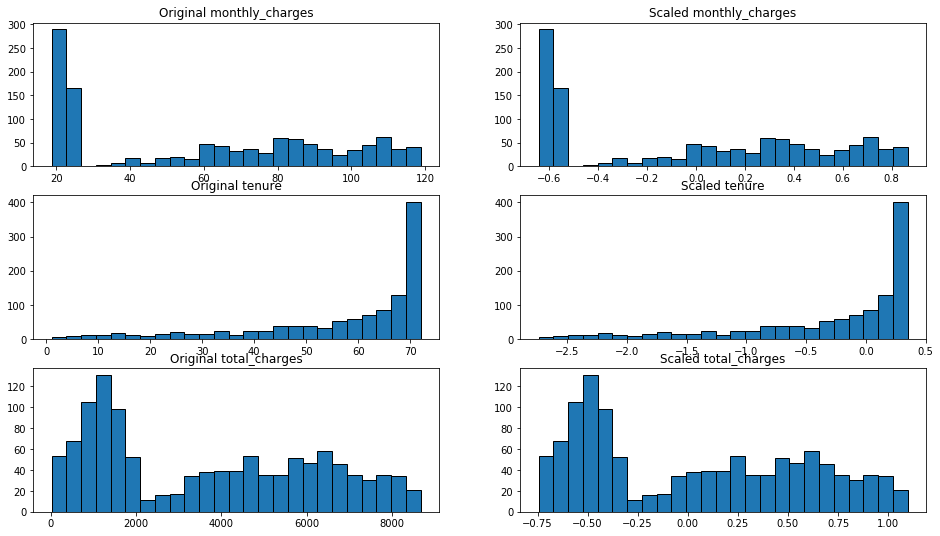

In [16]:
# Visualize the results of robust scaler

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_robust.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_robust.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_robust.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_robust.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_robust.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_robust.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [20]:
train_minmax.col

Index(['customer_id', 'monthly_charges', 'tenure', 'total_charges',
       'monthly_charges_scaled', 'tenure_scaled', 'total_charges_scaled'],
      dtype='object')

In [40]:
# Modify function 'add_scaled_columns' to 'add_inversed_columns'

def add_inversed_columns(train, validate, test, scaler, columns_to_inverse):
    new_column_names = [c + '_inversed' for c in columns_to_inverse]
    
    train = pd.concat([
        train,
        pd.DataFrame(scaler.inverse_transform(train[columns_to_inverse]), columns=new_column_names, index=train.index),
    ], axis=1)
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.inverse_transform(validate[columns_to_inverse]), columns=new_column_names, index=validate.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.inverse_transform(test[columns_to_inverse]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [41]:
# Reverse the MinMax columns

cols_to_inverse = ['monthly_charges_scaled', 'tenure_scaled', 'total_charges_scaled']

train_minmax_inv, validate_minmax_inv, test_minmax_inv = add_inversed_columns(train_minmax, 
                                                                              validate_minmax, 
                                                                              test_minmax, 
                                                                              scaler_minmax, 
                                                                              cols_to_inverse)

In [42]:
train_minmax_inv.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled,monthly_charges_scaled_inversed,tenure_scaled_inversed,total_charges_scaled_inversed
728,4573-JKNAE,19.35,12,212.30,0.005503,0.154930,0.022185,19.35,12.0,212.30
366,2229-DPMBI,19.50,8,162.15,0.007004,0.098592,0.016389,19.50,8.0,162.15
262,1568-LJSZU,92.20,68,6392.85,0.734367,0.943662,0.736526,92.20,68.0,6392.85
1629,9661-JALZV,24.70,58,1519.00,0.059030,0.802817,0.173212,24.70,58.0,1519.00
568,3498-LZGQZ,19.15,63,1177.05,0.003502,0.873239,0.133690,19.15,63.0,1177.05


In [43]:
# Data type of the inversed scaled data

train_minmax_inv.dtypes

customer_id                         object
monthly_charges                    float64
tenure                               int64
total_charges                      float64
monthly_charges_scaled             float64
tenure_scaled                      float64
total_charges_scaled               float64
monthly_charges_scaled_inversed    float64
tenure_scaled_inversed             float64
total_charges_scaled_inversed      float64
dtype: object

In [49]:
# Compare mothly_charges to mothly_charges_scaled_inversed

train_minmax_inv['monthly_charges'] != train_minmax_inv['monthly_charges_scaled_inversed']

728     False
366     False
262     False
1629    False
568     False
        ...  
450      True
43       True
1364    False
442     False
147     False
Length: 1181, dtype: bool

In [50]:
boolean = train_minmax_inv['monthly_charges'] != train_minmax_inv['monthly_charges_scaled_inversed']
train_minmax_inv[boolean]

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled,monthly_charges_scaled_inversed,tenure_scaled_inversed,total_charges_scaled_inversed
136,0795-XCCTE,25.40,72,1809.35,0.066033,1.000000,0.206771,25.40,72.0,1809.35
250,1488-PBLJN,116.85,72,8477.70,0.980990,1.000000,0.977491,116.85,72.0,8477.70
1664,9885-MFVSU,46.35,35,1662.05,0.275638,0.478873,0.189746,46.35,35.0,1662.05
1273,7605-BDWDC,49.85,31,1520.10,0.310655,0.422535,0.173339,49.85,31.0,1520.10
692,4213-HKBJO,25.70,33,826.10,0.069035,0.450704,0.093128,25.70,33.0,826.10
...,...,...,...,...,...,...,...,...,...,...
178,1080-BWSYE,25.65,64,1740.80,0.068534,0.887324,0.198848,25.65,64.0,1740.80
1335,7996-BPXHY,25.00,13,332.50,0.062031,0.169014,0.036078,25.00,13.0,332.50
1458,8659-IOOPU,100.45,71,7159.70,0.816908,0.985915,0.825158,100.45,71.0,7159.70
450,2773-OVBPK,111.30,67,7567.20,0.925463,0.929577,0.872256,111.30,67.0,7567.20


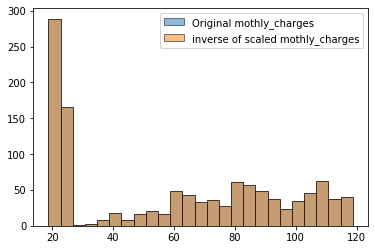

In [61]:
# Compare the original data and the inversed scaled data

plt.hist(train_minmax_inv.monthly_charges, bins=25, ec='black', alpha=0.5, label='Original mothly_charges')
plt.hist(train_minmax_inv.monthly_charges_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled mothly_charges')
plt.legend()

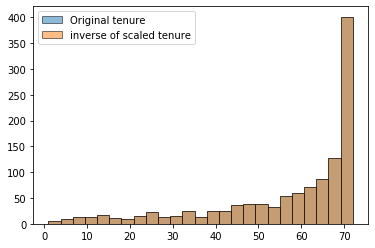

In [62]:
plt.hist(train_minmax_inv.tenure, bins=25, ec='black', alpha=0.5, label='Original tenure')
plt.hist(train_minmax_inv.tenure_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled tenure')
plt.legend()

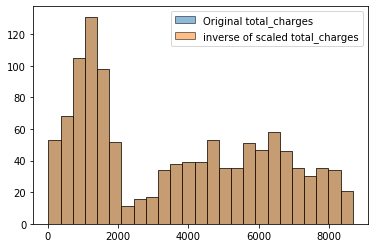

In [63]:
plt.hist(train_minmax_inv.total_charges, bins=25, ec='black', alpha=0.5, label='Original total_charges')
plt.hist(train_minmax_inv.total_charges_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled total_charges')
plt.legend()

**Takeaways**
1. Since the distribution are perfectly overlapped, we can conclude that the inversed scaled data is the same as the original data. 

In [64]:
# Reverse the Standard Scaler columns

cols_to_inverse = ['monthly_charges_scaled', 'tenure_scaled', 'total_charges_scaled']

train_standard_inv, validate_standard_inv, test_standard_inv = add_inversed_columns(train_standard, 
                                                                                    validate_standard, 
                                                                                    test_standard, 
                                                                                    scaler_standard, 
                                                                                    cols_to_inverse)

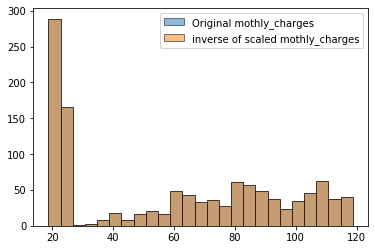

In [65]:
# Comparision by distribution plot

plt.hist(train_standard_inv.monthly_charges, bins=25, ec='black', alpha=0.5, label='Original mothly_charges')
plt.hist(train_standard_inv.monthly_charges_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled mothly_charges')
plt.legend()

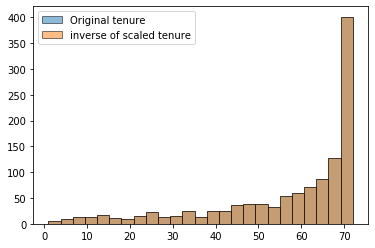

In [66]:
plt.hist(train_standard_inv.tenure, bins=25, ec='black', alpha=0.5, label='Original tenure')
plt.hist(train_standard_inv.tenure_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled tenure')
plt.legend()

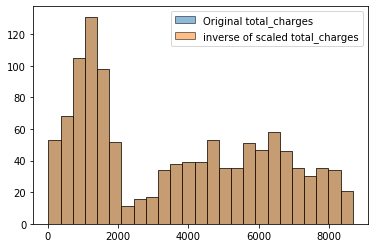

In [67]:
plt.hist(train_standard_inv.total_charges, bins=25, ec='black', alpha=0.5, label='Original total_charges')
plt.hist(train_standard_inv.total_charges_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled total_charges')
plt.legend()

In [68]:
# Reverse the Robust Scaled Columns

cols_to_inverse = ['monthly_charges_scaled', 'tenure_scaled', 'total_charges_scaled']

train_robust_inv, validate_robust_inv, test_robust_inv = add_inversed_columns(train_robust, 
                                                                              validate_robust, 
                                                                              test_robust, 
                                                                              scaler_robust, 
                                                                              cols_to_inverse)

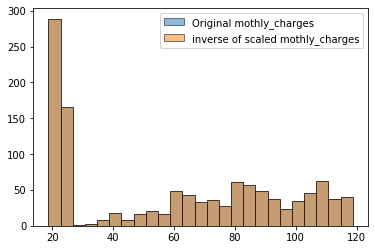

In [69]:
plt.hist(train_robust_inv.monthly_charges, bins=25, ec='black', alpha=0.5, label='Original mothly_charges')
plt.hist(train_robust_inv.monthly_charges_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled mothly_charges')
plt.legend()

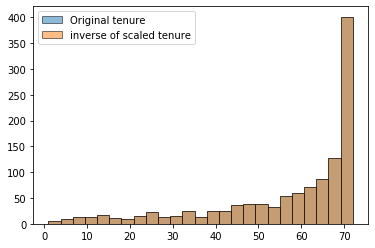

In [70]:
plt.hist(train_robust_inv.tenure, bins=25, ec='black', alpha=0.5, label='Original tenure')
plt.hist(train_robust_inv.tenure_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled tenure')
plt.legend()

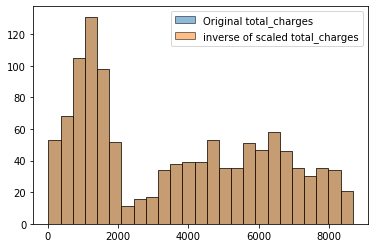

In [71]:
plt.hist(train_robust_inv.total_charges, bins=25, ec='black', alpha=0.5, label='Original total_charges')
plt.hist(train_robust_inv.total_charges_scaled_inversed, bins=25, ec='black', alpha = 0.5,
         label='inverse of scaled total_charges')
plt.legend()

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [90]:
# Create the quantile transformer object

X = columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

scaled_cols = sklearn.preprocessing.quantile_transform(train[X], output_distribution='normal')

In [91]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
728,4573-JKNAE,19.35,12,212.30
366,2229-DPMBI,19.50,8,162.15
262,1568-LJSZU,92.20,68,6392.85
1629,9661-JALZV,24.70,58,1519.00
568,3498-LZGQZ,19.15,63,1177.05


In [92]:
scaled_cols = pd.DataFrame(scaled_cols, 
                           index=train.index, 
                           columns = ['monthly_charges_scaled', 'tenure_scaled', 'total_charges_scaled'])

In [93]:
scaled_cols.head()

,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,-2.023292,-1.858747,-2.119857
366,-1.750222,-2.085356,-2.225216
262,0.754664,0.253606,0.851449
1629,-0.535083,-0.313694,-0.417175
568,-2.456904,-0.079120,-0.748107


In [94]:
train_quantile = pd.concat([train, scaled_cols], axis=1)

In [95]:
train_quantile.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,4573-JKNAE,19.35,12,212.30,-2.023292,-1.858747,-2.119857
366,2229-DPMBI,19.50,8,162.15,-1.750222,-2.085356,-2.225216
262,1568-LJSZU,92.20,68,6392.85,0.754664,0.253606,0.851449
1629,9661-JALZV,24.70,58,1519.00,-0.535083,-0.313694,-0.417175
568,3498-LZGQZ,19.15,63,1177.05,-2.456904,-0.079120,-0.748107


Text(0.5, 1.0, 'Scaled total_charges')

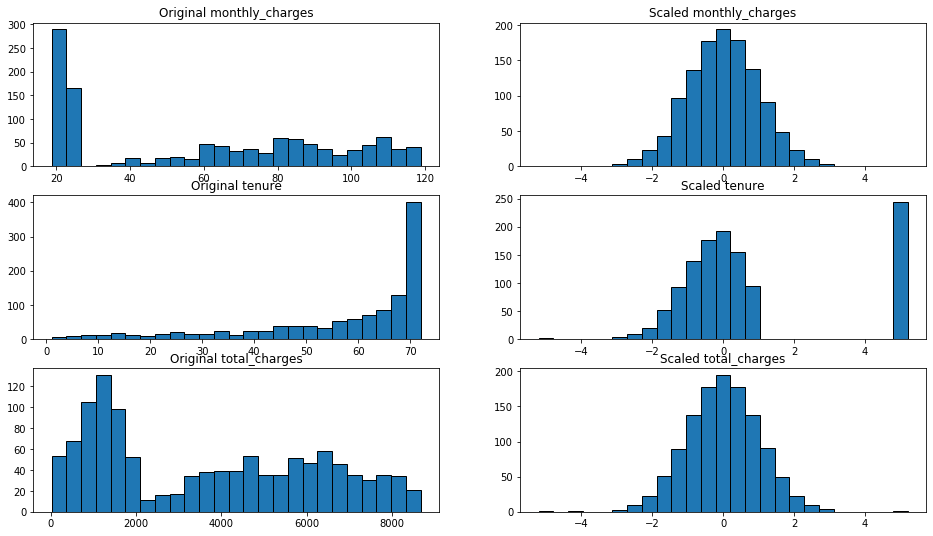

In [96]:
# Visualize the results of quantile-transforming scaling

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_quantile.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_quantile.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_quantile.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_quantile.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_quantile.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_quantile.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

### 4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

In [97]:
# Create the quantile transformer object

X = columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

scaled_cols = sklearn.preprocessing.quantile_transform(train[X])

In [98]:
scaled_cols = pd.DataFrame(scaled_cols, 
                           index=train.index, 
                           columns = ['monthly_charges_scaled', 'tenure_scaled', 'total_charges_scaled'])

train_quantile = pd.concat([train, scaled_cols], axis=1)

Text(0.5, 1.0, 'Scaled total_charges')

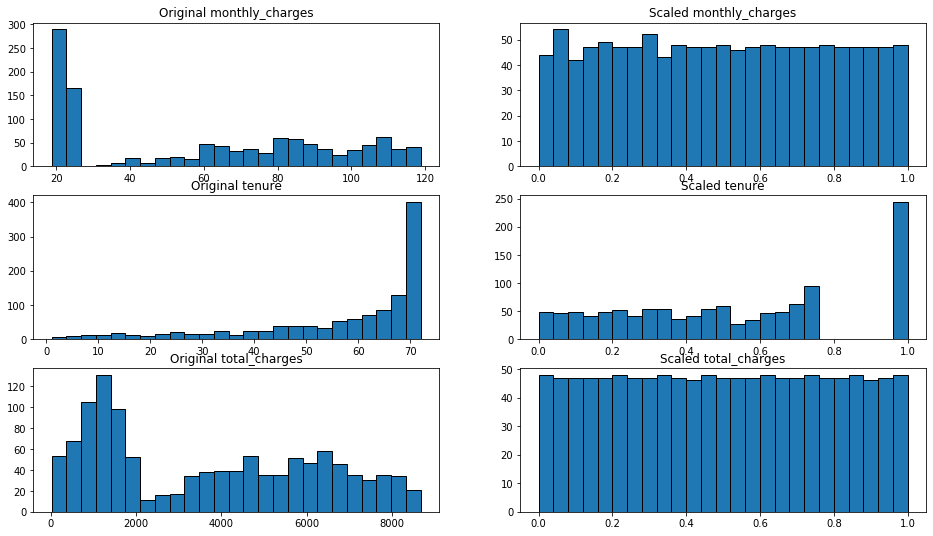

In [99]:
# Visualize the results of quantile-transforming scaling

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train_quantile.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train_quantile.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train_quantile.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train_quantile.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train_quantile.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train_quantile.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [2]:
# Define a function named `scale_telco` for MinMax Scaling
# Test the function

train, validate, test = wrangle.wrangle_telco()

In [3]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
728,4573-JKNAE,19.35,12,212.30
366,2229-DPMBI,19.50,8,162.15
262,1568-LJSZU,92.20,68,6392.85
1629,9661-JALZV,24.70,58,1519.00
568,3498-LZGQZ,19.15,63,1177.05


In [4]:
columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

train, validate, test = prepare.scale_telco(train, validate, test, columns_to_scale)

In [5]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
728,4573-JKNAE,19.35,12,212.30,0.005503,0.154930,0.022185
366,2229-DPMBI,19.50,8,162.15,0.007004,0.098592,0.016389
262,1568-LJSZU,92.20,68,6392.85,0.734367,0.943662,0.736526
1629,9661-JALZV,24.70,58,1519.00,0.059030,0.802817,0.173212
568,3498-LZGQZ,19.15,63,1177.05,0.003502,0.873239,0.133690


Text(0.5, 1.0, 'Scaled total_charges')

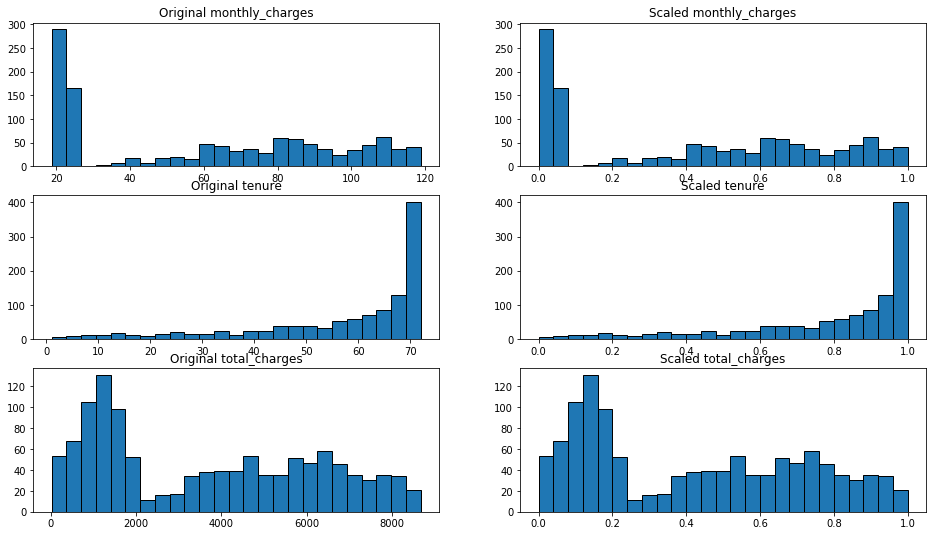

In [6]:
# Visualize the results of min-max scaling

plt.figure(figsize=(16, 9))
plt.subplot(321)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly_charges')
plt.subplot(322)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled monthly_charges')

plt.subplot(323)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(324)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(325)

plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original total_charges')
plt.subplot(326)
plt.hist(train.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled total_charges')

In [7]:
validate.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
703,4312-KFRXN,25.40,72,1710.90,0.066033,1.000000,0.195392
62,0392-BZIUW,105.00,72,7589.80,0.862431,1.000000,0.874869
1363,8143-ETQTI,19.65,23,451.55,0.008504,0.309859,0.049838
919,5663-QBGIS,98.35,72,6929.40,0.795898,1.000000,0.798540
1647,9788-HNGUT,116.95,72,8594.40,0.981991,1.000000,0.990979


In [8]:
test.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
626,3795-CAWEX,116.55,70,8152.30,0.977989,0.971831,0.939882
1505,8929-KSWIH,99.30,25,2513.50,0.805403,0.338028,0.288155
411,2499-AJYUA,110.80,72,7882.25,0.920460,1.000000,0.908670
1179,7037-MTYVW,85.40,38,3297.00,0.666333,0.521127,0.378712
1541,9140-CZQZZ,79.60,68,5515.80,0.608304,0.943662,0.635158
